# Importing necessary libraries

In [20]:
pip install optuna

Note: you may need to restart the kernel to use updated packages.


In [21]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Importing scikit-learn modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Importing LGBMClassifier
from lightgbm import LGBMClassifier

# Importing Optuna for hyperparameter optimization
from optuna.samplers import TPESampler
import optuna

# Ignoring warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

# Pandas setting to display more dataset rows and columns
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 600)


# Set Seaborn style
sns.set(style="whitegrid")


# Data Loading and Initial Inspection

In [22]:
train_data = pd.read_csv('train.csv')
train_data.name = "Train Dataset"
test_data = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

original_data = pd.read_csv('ObesityDataSet.csv')
original_data.name = "Original Dataset"

print("# Train Data INFO\n")
print(train_data.info())
print('='*50)
print("\n# Original Data INFO\n")
print(train_data.info())

# Train Data INFO

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC          

In [23]:
train_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [24]:
train_data.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
id,20758.000000,10378.500000,5992.462780,0.000000,5189.250000,10378.500000,15567.750000,20757.000000
Age,20758.000000,23.841804,5.688072,14.000000,20.000000,22.815416,26.000000,61.000000
Height,20758.000000,1.700245,0.087312,1.450000,1.631856,1.700000,1.762887,1.975663
Weight,20758.000000,87.887768,26.379443,39.000000,66.000000,84.064875,111.600553,165.057269
FCVC,20758.000000,2.445908,0.533218,1.000000,2.000000,2.393837,3.000000,3.000000
NCP,20758.000000,2.761332,0.705375,1.000000,3.000000,3.000000,3.000000,4.000000
CH2O,20758.000000,2.029418,0.608467,1.000000,1.792022,2.000000,2.549617,3.000000
FAF,20758.000000,0.981747,0.838302,0.000000,0.008013,1.000000,1.587406,3.000000
TUE,20758.000000,0.616756,0.602113,0.000000,0.000000,0.573887,1.000000,2.000000


In [25]:
test_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [26]:
test_data.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
id,13840.000000,27677.500000,3995.408198,20758.000000,24217.750000,27677.500000,31137.250000,34597.000000
Age,13840.000000,23.952740,5.799814,14.000000,20.000000,22.906342,26.000000,61.000000
Height,13840.000000,1.698934,0.088761,1.450000,1.631662,1.700000,1.760710,1.980000
Weight,13840.000000,87.384504,26.111819,39.000000,65.000000,83.952968,111.157811,165.057269
FCVC,13840.000000,2.442898,0.531606,1.000000,2.000000,2.358087,3.000000,3.000000
NCP,13840.000000,2.750610,0.710927,1.000000,3.000000,3.000000,3.000000,4.000000
CH2O,13840.000000,2.032044,0.611230,1.000000,1.771781,2.000000,2.552388,3.000000
FAF,13840.000000,0.974532,0.840361,0.000000,0.001086,1.000000,1.571865,3.000000
TUE,13840.000000,0.611033,0.608005,0.000000,0.000000,0.552498,1.000000,2.000000


In [27]:
original_data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [28]:
original_data.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
Age,2111.000000,24.312600,6.345968,14.000000,19.947192,22.777890,26.000000,61.000000
Height,2111.000000,1.701677,0.093305,1.450000,1.630000,1.700499,1.768464,1.980000
Weight,2111.000000,86.586058,26.191172,39.000000,65.473343,83.000000,107.430682,173.000000
FCVC,2111.000000,2.419043,0.533927,1.000000,2.000000,2.385502,3.000000,3.000000
NCP,2111.000000,2.685628,0.778039,1.000000,2.658738,3.000000,3.000000,4.000000
CH2O,2111.000000,2.008011,0.612953,1.000000,1.584812,2.000000,2.477420,3.000000
FAF,2111.000000,1.010298,0.850592,0.000000,0.124505,1.000000,1.666678,3.000000
TUE,2111.000000,0.657866,0.608927,0.000000,0.000000,0.625350,1.000000,2.000000


# Visualizing Null Values in Datasets


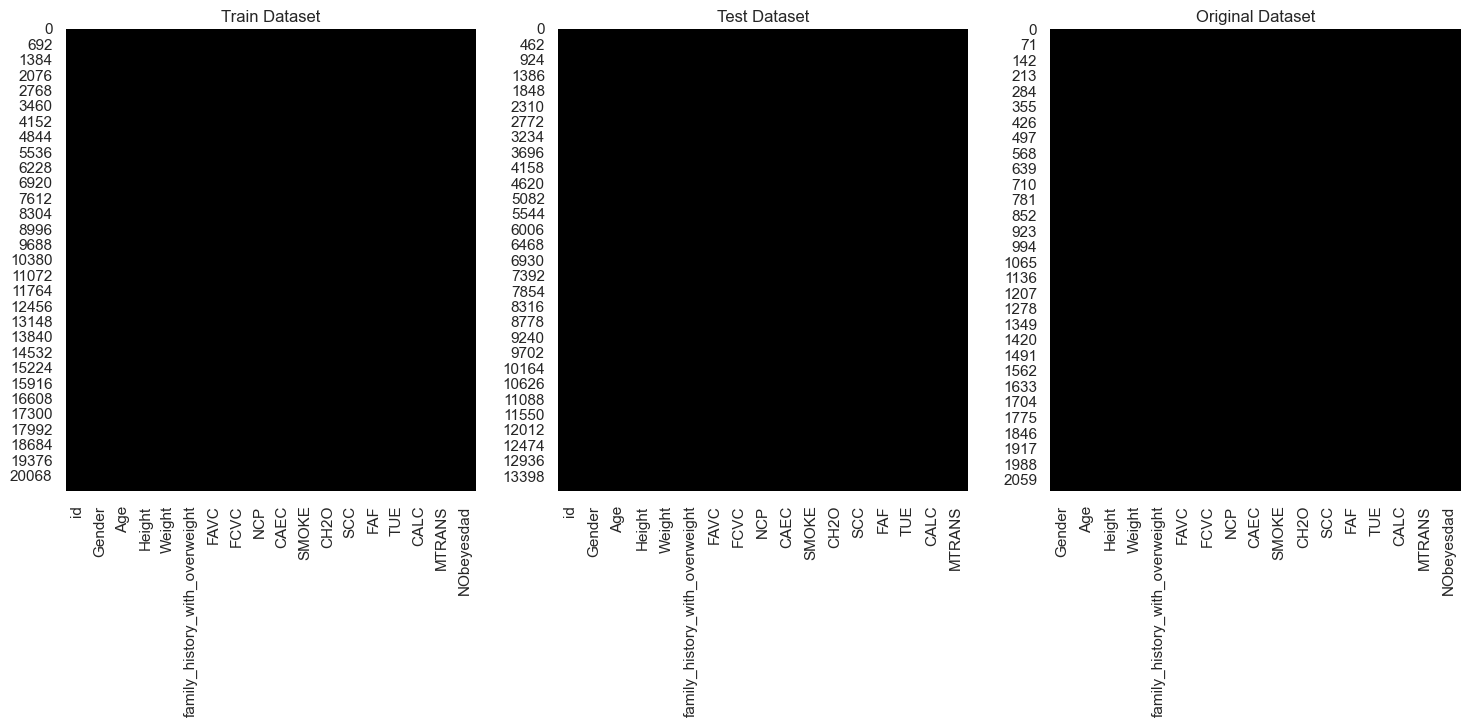

In [29]:
# Create a subplot with dimensions (1, 3)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Visualize null values in train dataset
sns.heatmap(train_data.isna(), cmap='gray', cbar=False, ax=axes[0])
axes[0].set_title('Train Dataset')

# Visualize null values in test dataset
sns.heatmap(test_data.isna(), cmap='gray', cbar=False, ax=axes[1])
axes[1].set_title('Test Dataset')

# Visualize null values in original dataset
sns.heatmap(original_data.isna(), cmap='gray', cbar=False, ax=axes[2])
axes[2].set_title('Original Dataset')

plt.show()

## Note: There are no null values in the datasets.

# Extracting Variable Types

In [30]:
def get_variable_types(dataframe):
    continuous_vars = []
    categorical_vars = []

    for column in dataframe.columns:
        if dataframe[column].dtype == 'object':
            categorical_vars.append(column)
        else:
            continuous_vars.append(column)

    return continuous_vars, categorical_vars

continuous_vars, categorical_vars = get_variable_types(train_data)
continuous_vars.remove('id'), categorical_vars.remove('NObeyesdad')

print("Continuous Variables:", continuous_vars)
print("Categorical Variables:", categorical_vars)


Continuous Variables: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
Categorical Variables: ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']


# Plotting Distribution of a Categorical Columns

In [31]:
def plot_distribution(dataframe, target_column):
    # Calculate value counts
    value_counts = dataframe[target_column].value_counts()

    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # Bar plot on the first subplot
    sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis", ax=ax1)
    ax1.set_xlabel(target_column, fontsize=12)
    ax1.set_ylabel('Count', fontsize=12)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=10)

    # Add data labels above each bar
    for index, value in enumerate(value_counts):
        ax1.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

    # Pie plot on the second subplot
    ax2.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', colors=sns.color_palette("viridis", len(value_counts)))
    ax2.axis('equal')

    # Main title for the figure
    fig.suptitle(f'Comparison of {target_column} Distribution in ({dataframe.name})', fontsize=18)
    
    # Adjust layout and display the figure
    plt.tight_layout()
    plt.show()

# Target Column Distribution Analysis

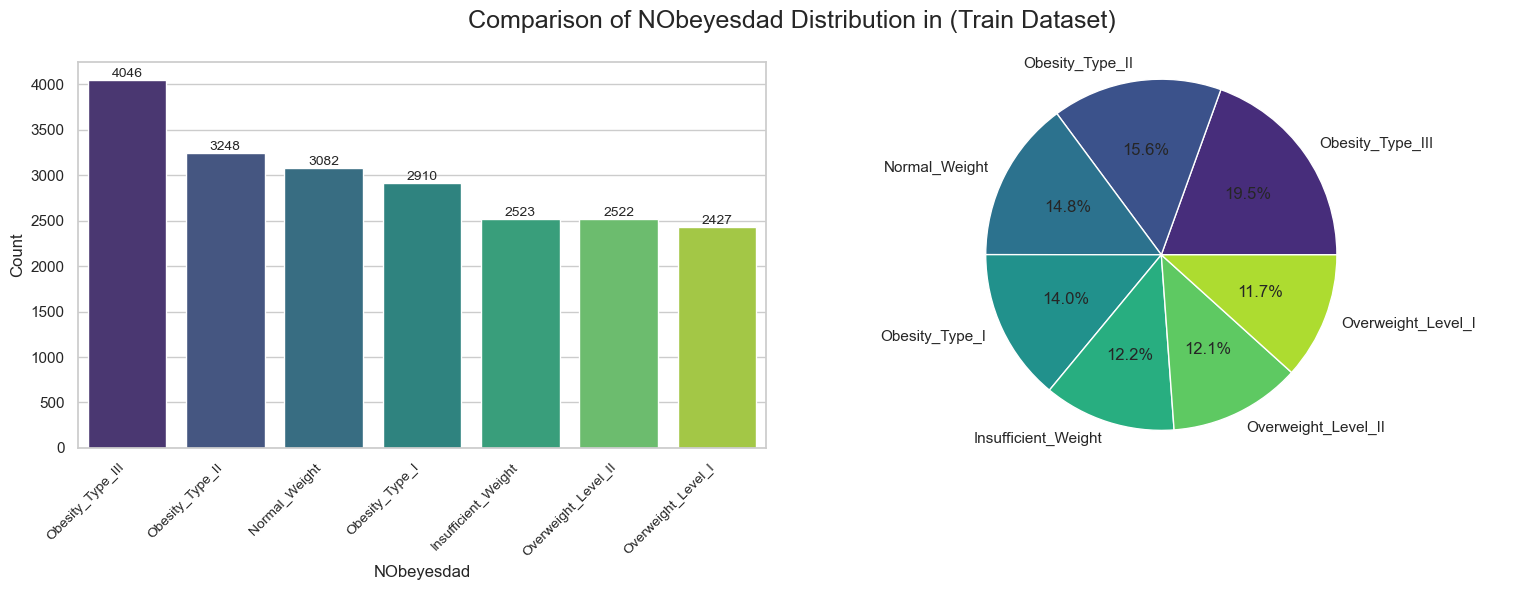

In [32]:
plot_distribution(train_data, 'NObeyesdad')

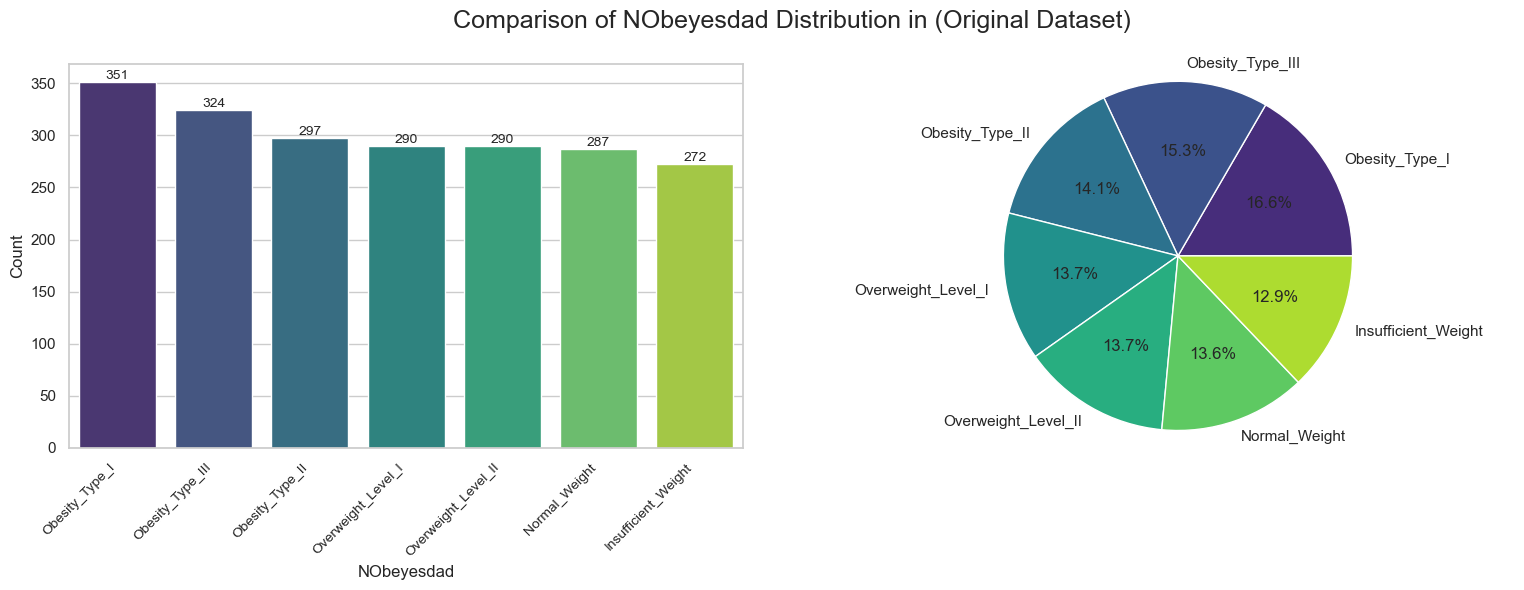

In [33]:
plot_distribution(original_data, 'NObeyesdad')

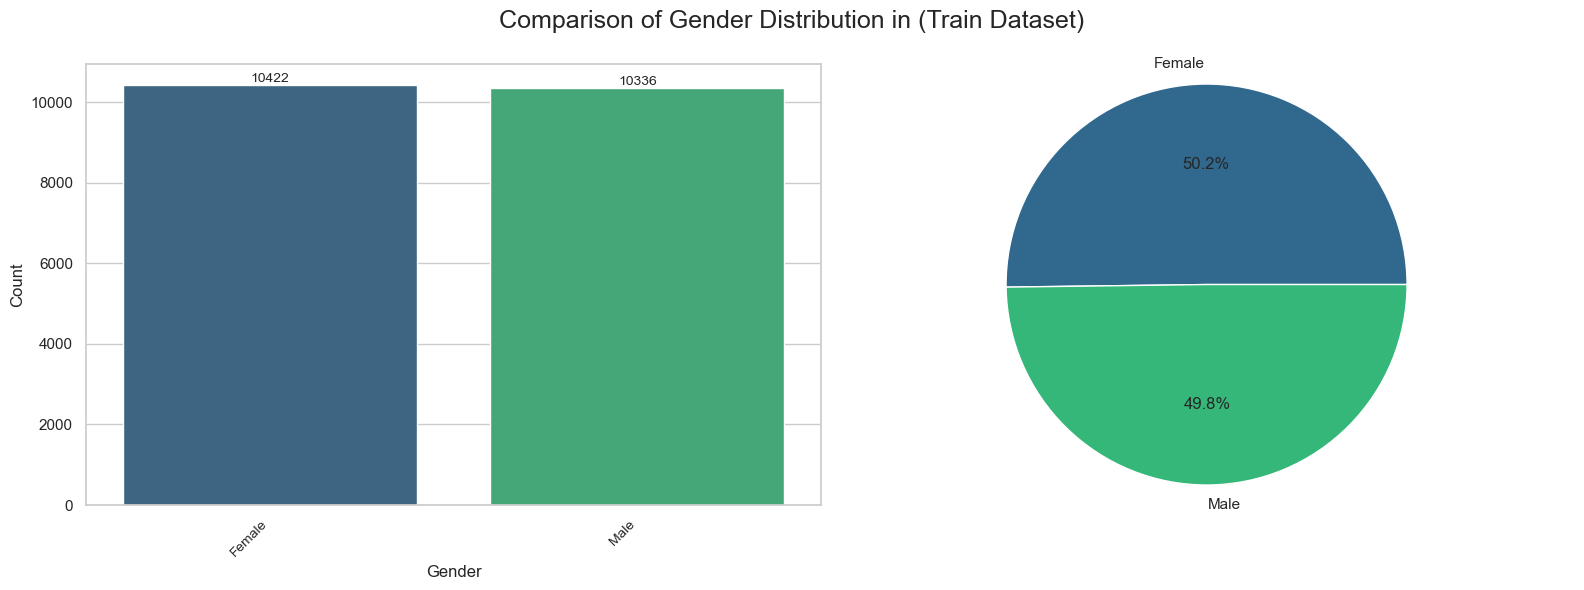

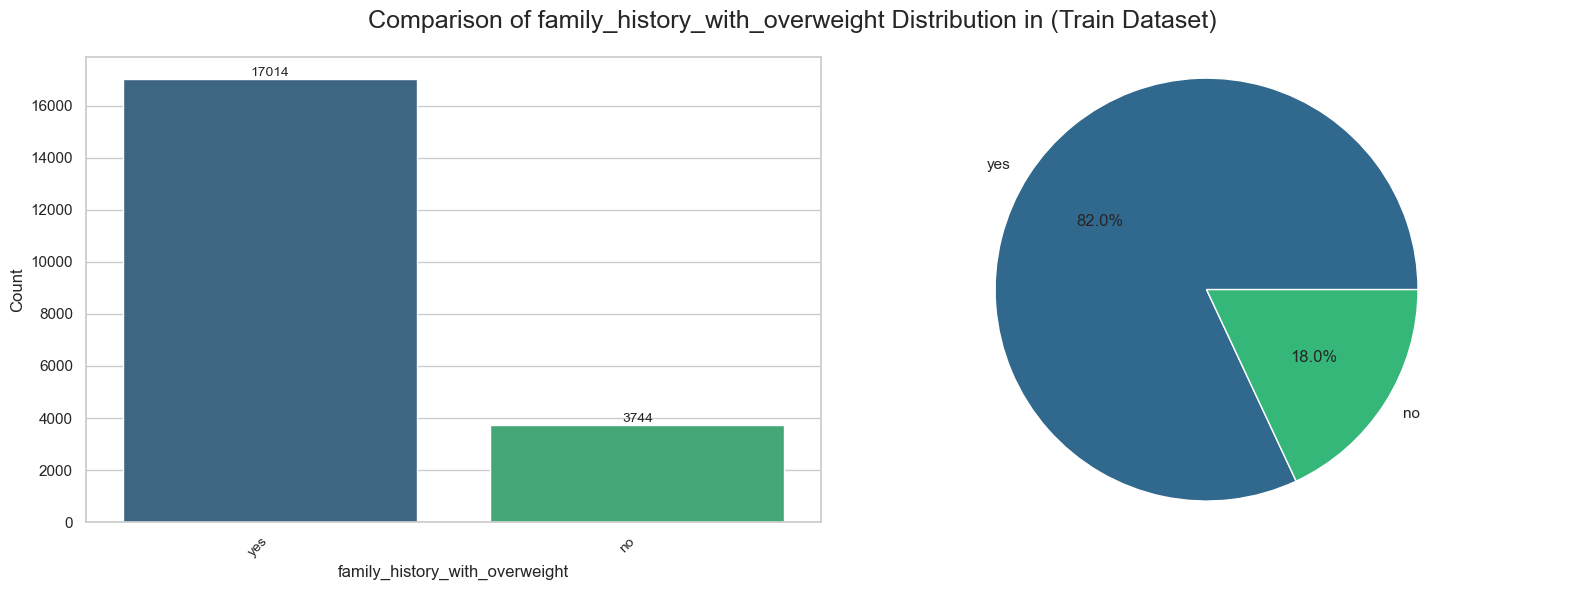

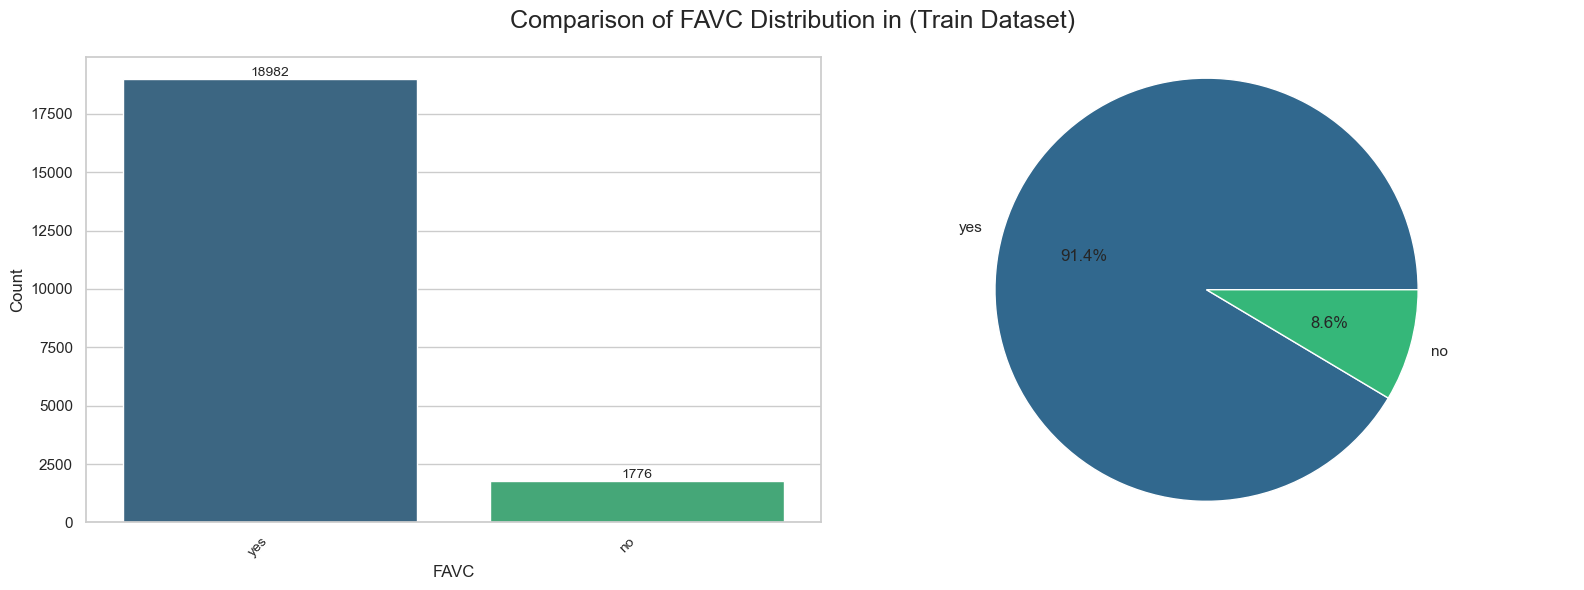

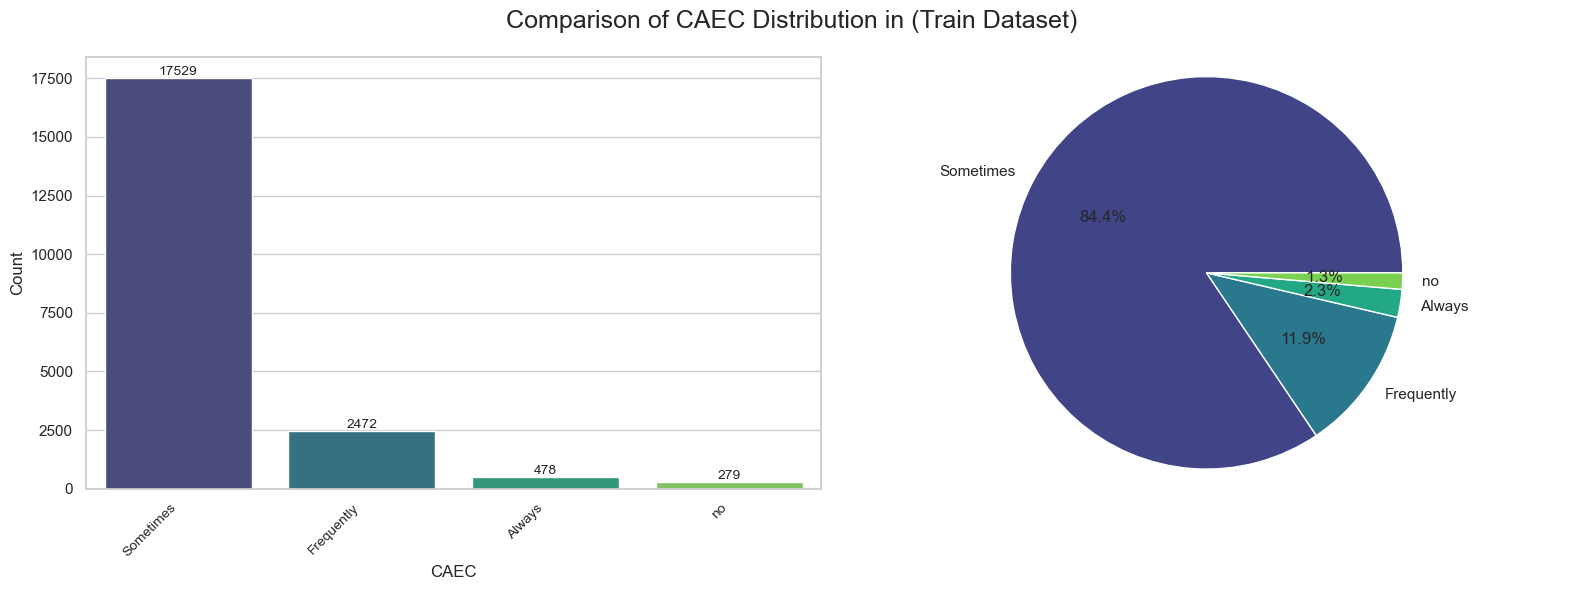

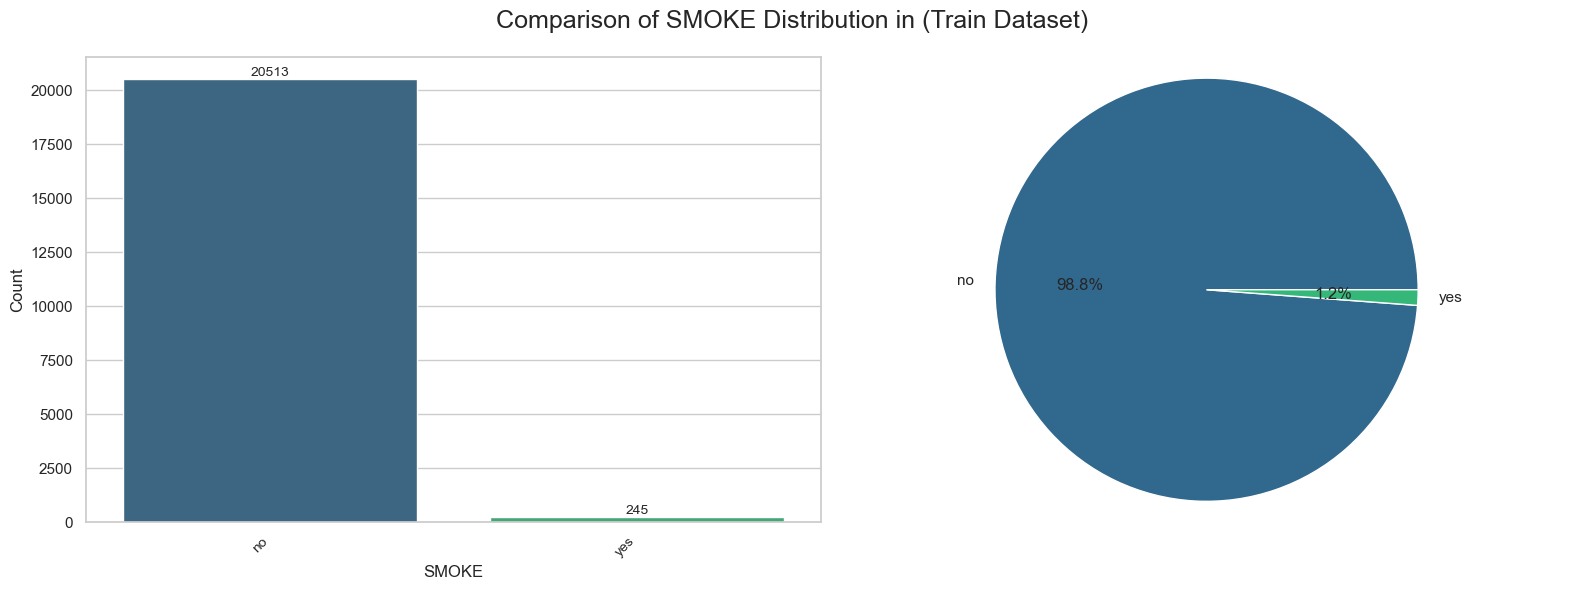

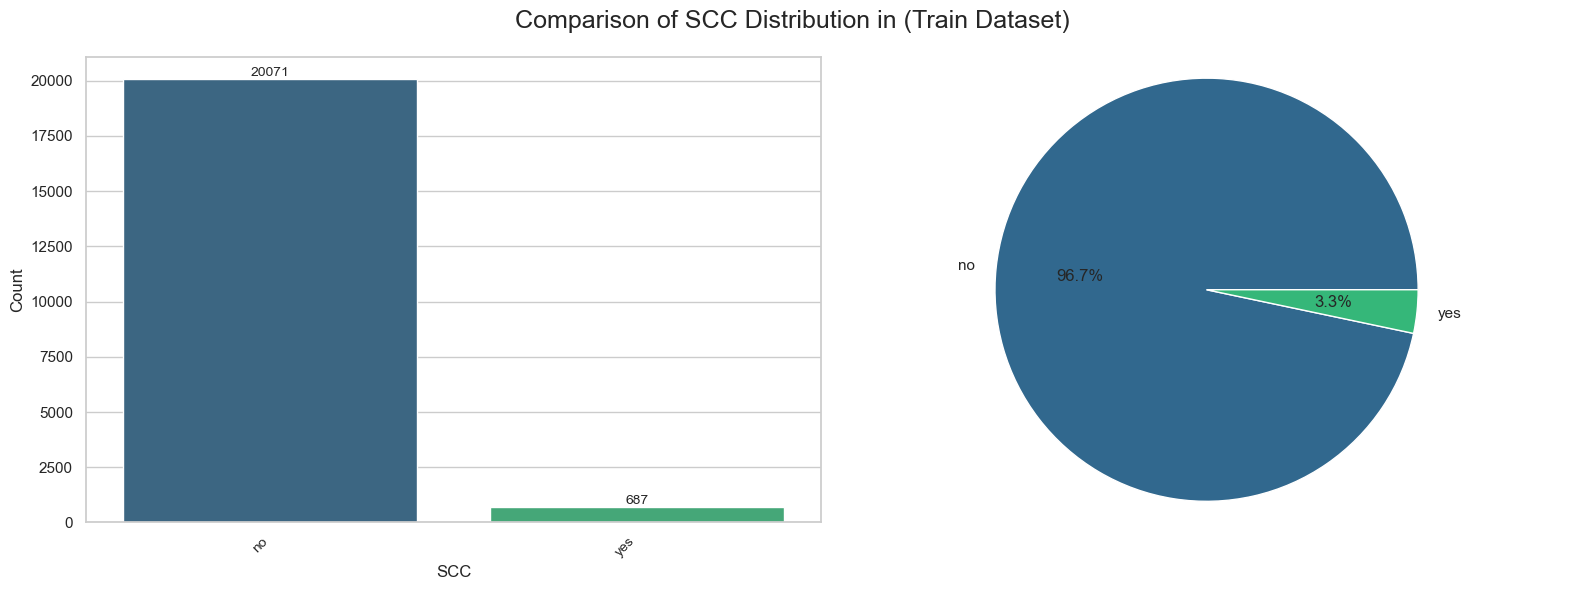

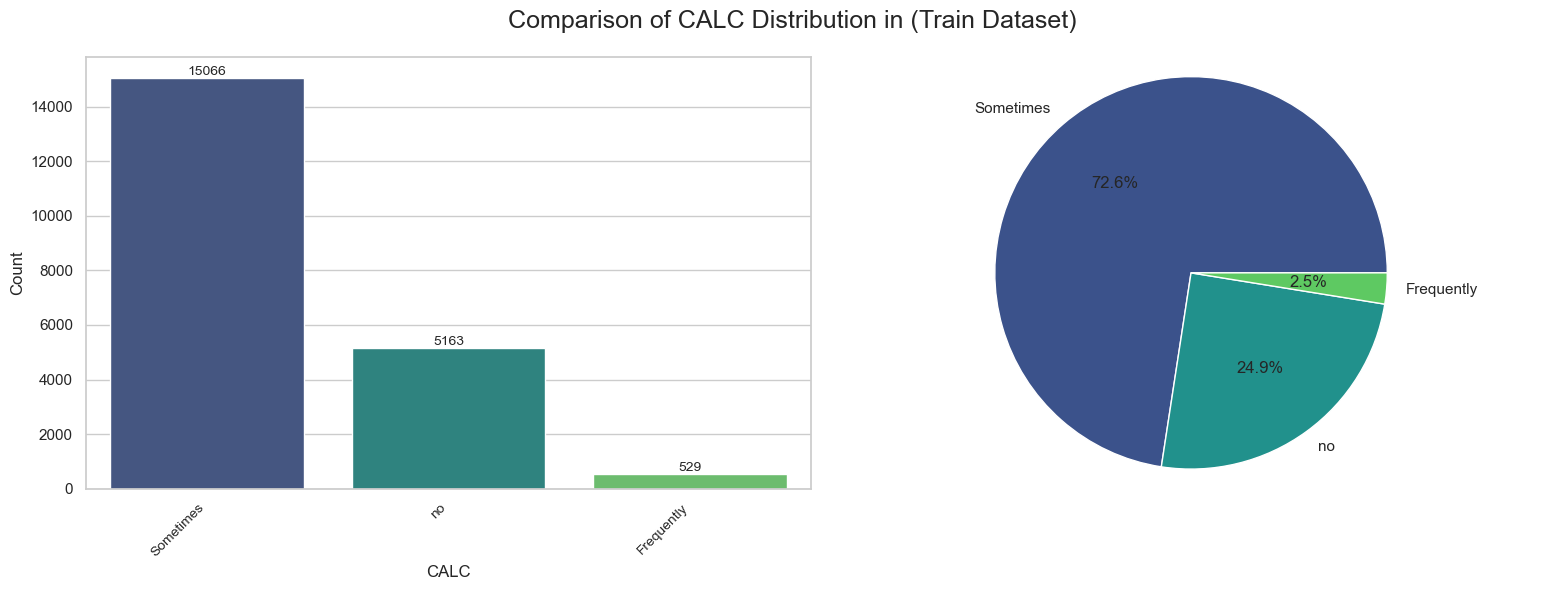

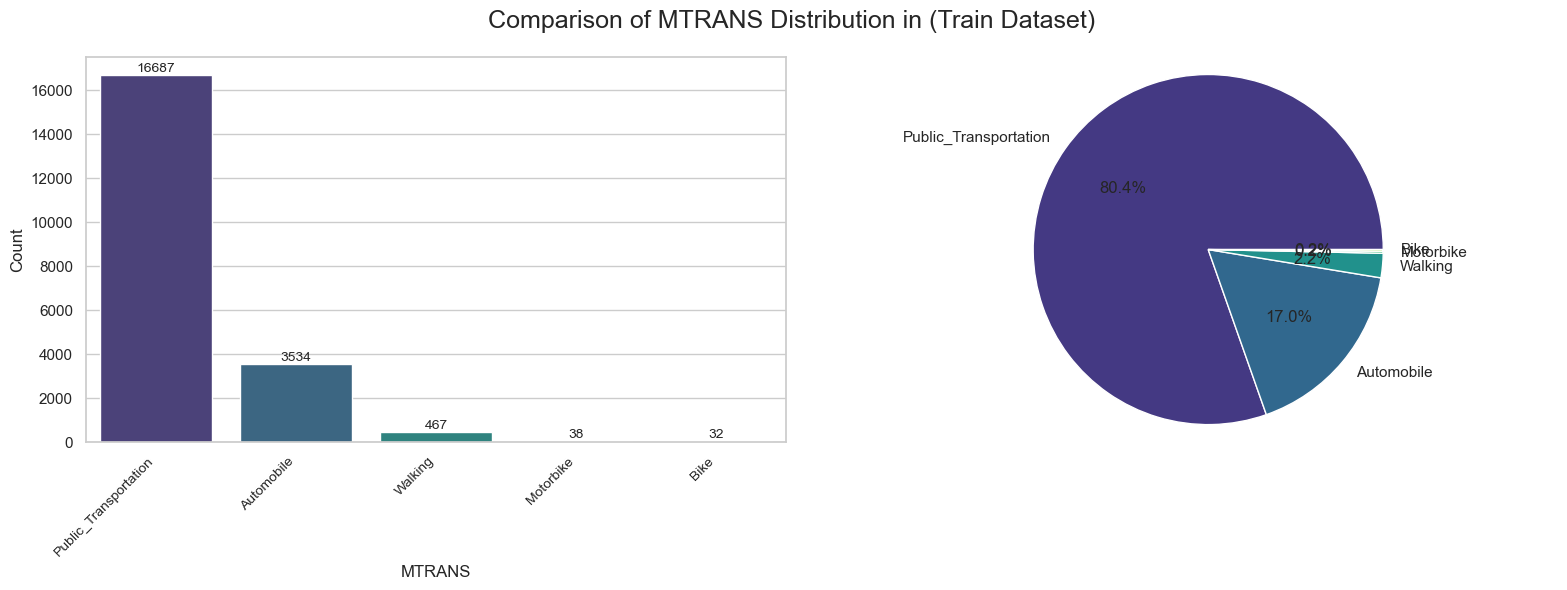

In [34]:
for column in categorical_vars:
    plot_distribution(train_data, column)

# Plotting Histograms and Density Plots for Continuous Variables

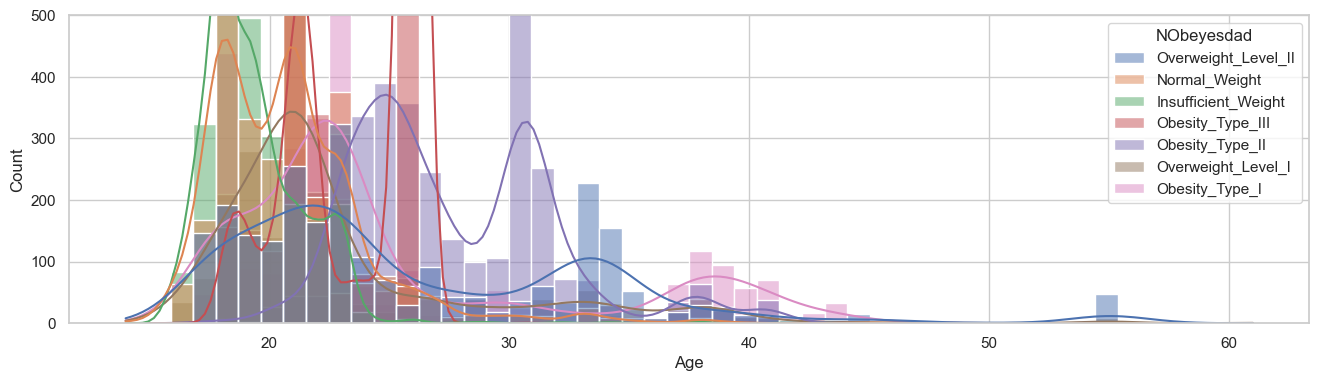

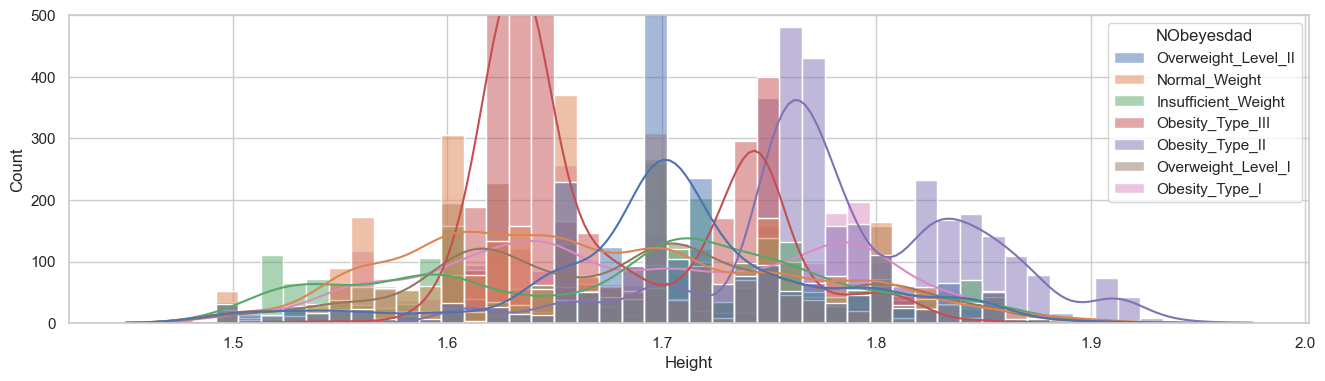

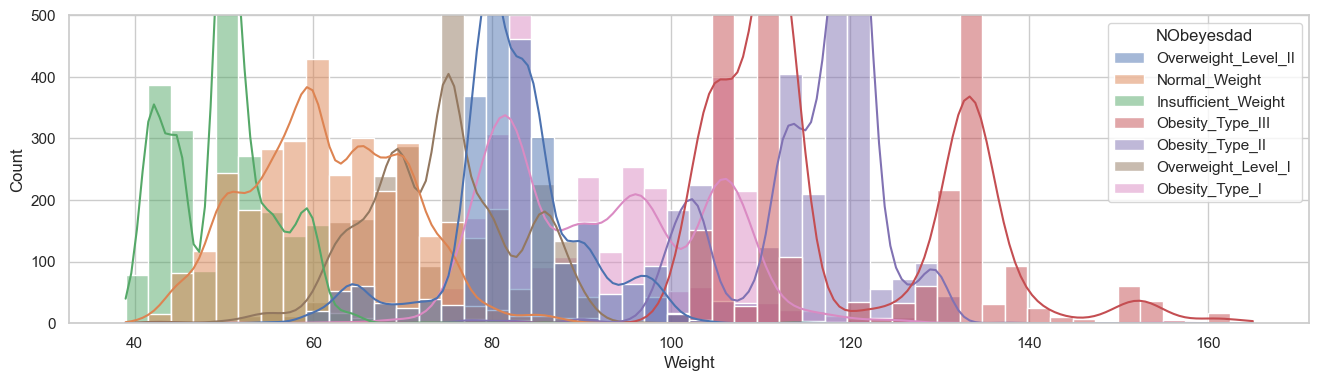

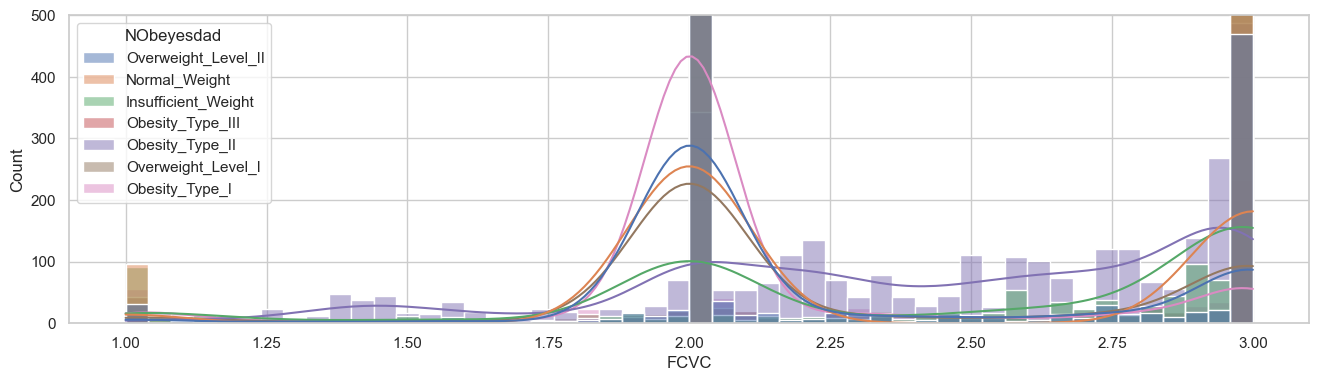

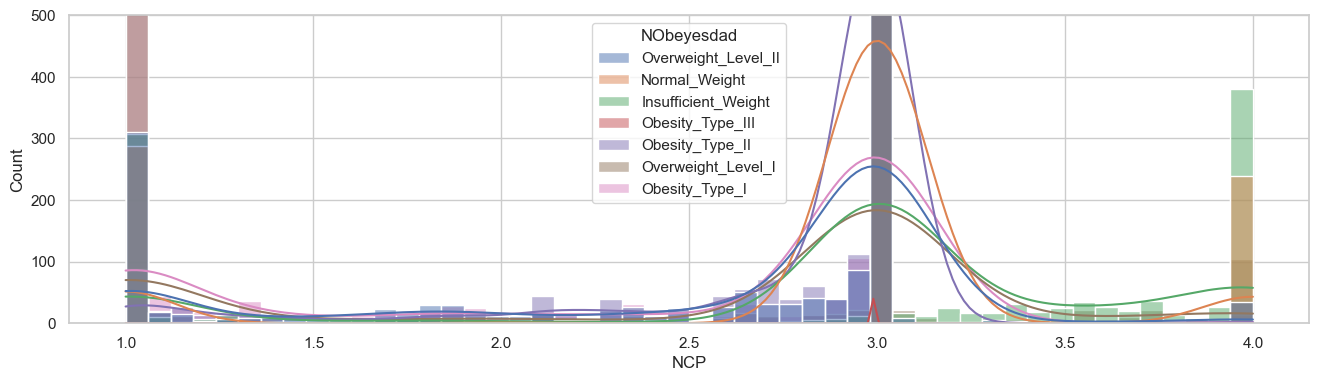

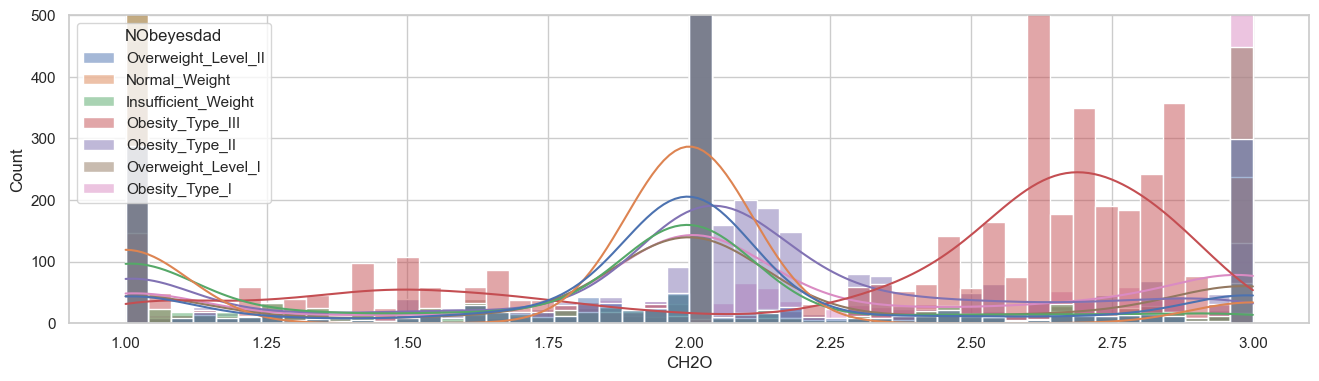

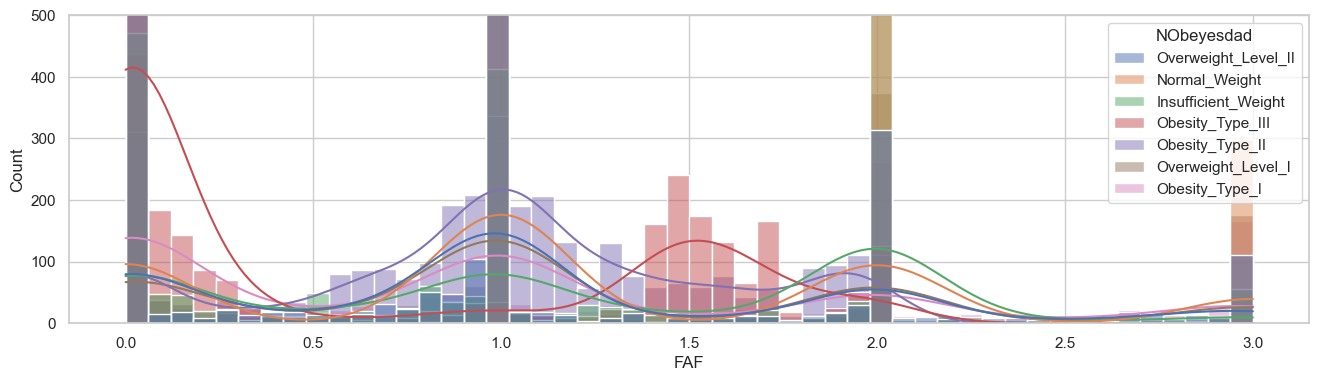

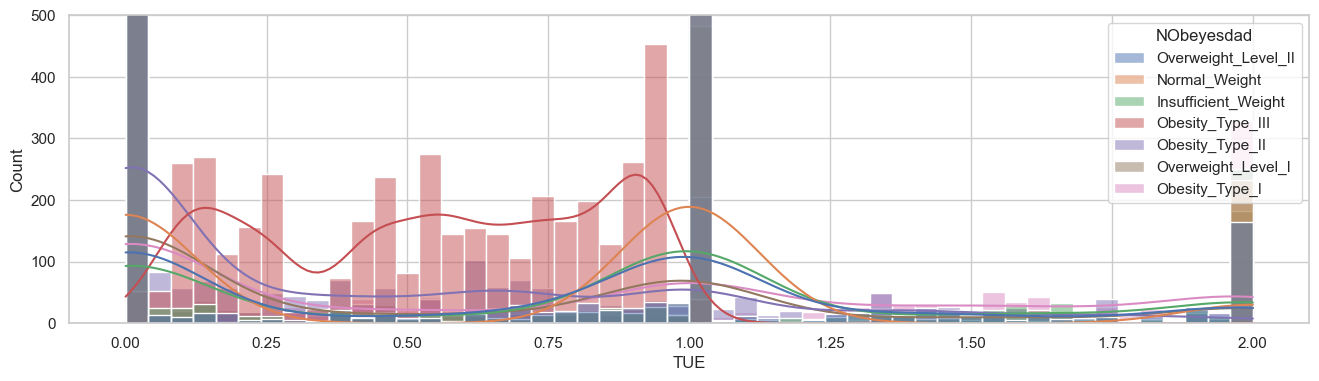

In [47]:
def plot_histograms_and_density(dataframe, columns):
    for column in columns:
        fig, ax = plt.subplots(figsize=(16, 4))
        fig = sns.histplot(data=train_data, x=column, hue="NObeyesdad", bins=50, kde=True)
        plt.ylim(0,500)
        plt.show()
        
plot_histograms_and_density(train_data, continuous_vars)

# Concatenating Train Data from Competition with Original Data


In [36]:
train = pd.concat([train_data, original_data]).drop(['id'], axis=1).drop_duplicates()
test = test_data.drop(['id'], axis=1)
train

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.000000,3.000000,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.000000,3.000000,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.000000,3.000000,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.000000,3.000000,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


# One-Hot Encoding Categorical Variables in Training and Test Data

In [37]:
train = pd.get_dummies(train,
                       columns=categorical_vars)
test = pd.get_dummies(test, 
                      columns=categorical_vars)
train.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,Overweight_Level_II,False,True,False,True,False,True,False,False,True,False,True,False,True,False,False,False,True,False,False,False,False,True,False
1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,Normal_Weight,True,False,False,True,False,True,False,True,False,False,True,False,True,False,False,False,False,True,True,False,False,False,False
2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,Insufficient_Weight,True,False,False,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,False,False,False,True,False
3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,Obesity_Type_III,True,False,False,True,False,True,False,False,True,False,True,False,True,False,False,False,True,False,False,False,False,True,False
4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,Overweight_Level_II,False,True,False,True,False,True,False,False,True,False,True,False,True,False,False,False,True,False,False,False,False,True,False


## Separating Features (X) and Target Variable (y)


In [38]:
X = train.drop(['NObeyesdad'], axis=1)
y = train['NObeyesdad']
X

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,False,True,False,True,False,True,False,False,True,False,True,False,True,False,False,False,True,False,False,False,False,True,False
1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,True,False,False,True,False,True,False,True,False,False,True,False,True,False,False,False,False,True,True,False,False,False,False
2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,True,False,False,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,False,False,False,True,False
3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,True,False,False,True,False,True,False,False,True,False,True,False,True,False,False,False,True,False,False,False,False,True,False
4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,False,True,False,True,False,True,False,False,True,False,True,False,True,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.000000,3.000000,1.728139,1.676269,0.906247,True,False,False,True,False,True,False,False,True,False,True,False,True,False,False,False,True,False,False,False,False,True,False
2107,21.982942,1.748584,133.742943,3.000000,3.000000,2.005130,1.341390,0.599270,True,False,False,True,False,True,False,False,True,False,True,False,True,False,False,False,True,False,False,False,False,True,False
2108,22.524036,1.752206,133.689352,3.000000,3.000000,2.054193,1.414209,0.646288,True,False,False,True,False,True,False,False,True,False,True,False,True,False,False,False,True,False,False,False,False,True,False
2109,24.361936,1.739450,133.346641,3.000000,3.000000,2.852339,1.139107,0.586035,True,False,False,True,False,True,False,False,True,False,True,False,True,False,False,False,True,False,False,False,False,True,False


In [39]:
y

0       Overweight_Level_II
1             Normal_Weight
2       Insufficient_Weight
3          Obesity_Type_III
4       Overweight_Level_II
               ...         
2106       Obesity_Type_III
2107       Obesity_Type_III
2108       Obesity_Type_III
2109       Obesity_Type_III
2110       Obesity_Type_III
Name: NObeyesdad, Length: 22845, dtype: object

# Splitting Data into Training and Testing Sets


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (18276, 31)
X_test shape: (4569, 31)
y_train shape: (18276,)
y_test shape: (4569,)


# Optimizing Hyperparameters for LGBMClassifier using Optuna

In [41]:
#The tuning process has been commented out due to its time-consuming nature.

# Define the objective function for Optuna optimization
def objective(trial, X_train, y_train, X_test, y_test):
    # Define parameters to be optimized for the LGBMClassifier
    param = {
        "objective": "multiclass",
        "metric": "multi_logloss",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "random_state": 42,
        "num_class": 7,
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.05),
        "n_estimators": trial.suggest_int("n_estimators", 400, 600),
        "lambda_l1": trial.suggest_float("lambda_l1", 0.005, 0.015),
        "lambda_l2": trial.suggest_float("lambda_l2", 0.02, 0.06),
        "max_depth": trial.suggest_int("max_depth", 6, 14),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.3, 0.9),
        "subsample": trial.suggest_float("subsample", 0.8, 1.0),
        "min_child_samples": trial.suggest_int("min_child_samples", 10, 50),
    }

    # Create an instance of LGBMClassifier with the suggested parameters
    lgbm_classifier = LGBMClassifier(**param)
    
    # Fit the classifier on the training data
    lgbm_classifier.fit(X_train, y_train)

    # Evaluate the classifier on the test data
    score = lgbm_classifier.score(X_test, y_test)

    return score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust the test_size as needed

# Set up the sampler for Optuna optimization
sampler = optuna.samplers.TPESampler(seed=42)  # Using Tree-structured Parzen Estimator sampler for optimization

# Create a study object for Optuna optimization
study = optuna.create_study(direction="maximize", sampler=sampler)

# Run the optimization process
study.optimize(lambda trial: objective(trial, X_train, y_train, X_test, y_test), n_trials=100)

# Get the best parameters after optimization
best_params = study.best_params

print('='*50)
print(best_params)


[I 2024-04-10 17:13:56,169] A new study created in memory with name: no-name-241cc5ed-c974-420b-ab8f-58f212647e64


[I 2024-04-10 17:14:01,553] Trial 0 finished with value: 0.9146421536441235 and parameters: {'learning_rate': 0.0249816047538945, 'n_estimators': 591, 'lambda_l1': 0.012319939418114049, 'lambda_l2': 0.04394633936788146, 'max_depth': 7, 'colsample_bytree': 0.3935967122017216, 'subsample': 0.8116167224336399, 'min_child_samples': 45}. Best is trial 0 with value: 0.9146421536441235.
[I 2024-04-10 17:14:06,676] Trial 1 finished with value: 0.9146421536441235 and parameters: {'learning_rate': 0.034044600469728355, 'n_estimators': 542, 'lambda_l1': 0.005205844942958024, 'lambda_l2': 0.05879639408647977, 'max_depth': 13, 'colsample_bytree': 0.4274034664069657, 'subsample': 0.8363649934414201, 'min_child_samples': 17}. Best is trial 0 with value: 0.9146421536441235.
[I 2024-04-10 17:14:11,188] Trial 2 finished with value: 0.9150798861895382 and parameters: {'learning_rate': 0.02216968971838151, 'n_estimators': 505, 'lambda_l1': 0.009319450186421156, 'lambda_l2': 0.03164916560792168, 'max_depth

{'learning_rate': 0.020249646530953964, 'n_estimators': 561, 'lambda_l1': 0.01151148460342115, 'lambda_l2': 0.04179231203490102, 'max_depth': 6, 'colsample_bytree': 0.4926798125853037, 'subsample': 0.9409506169401225, 'min_child_samples': 42}


# Best parameters obtained from Optuna optimization process

In [42]:
# Best parameters obtained from Optuna optimization process

best_params = {
    "objective": "multiclass",          # Objective function for the model
    "metric": "multi_logloss",          # Evaluation metric
    "verbosity": -1,                    # Verbosity level (-1 for silent)
    "boosting_type": "gbdt",            # Gradient boosting type
    "random_state": 42,       # Random state for reproducibility
    "num_class": 7,                     # Number of classes in the dataset
    'learning_rate': 0.030962211546832760,  # Learning rate for gradient boosting
    'n_estimators': 500,                # Number of boosting iterations
    'lambda_l1': 0.009667446568254372,  # L1 regularization term
    'lambda_l2': 0.04018641437301800,   # L2 regularization term
    'max_depth': 10,                    # Maximum depth of the trees
    'colsample_bytree': 0.40977129346872643,  # Fraction of features to consider for each tree
    'subsample': 0.9535797422450176,    # Fraction of samples to consider for each boosting iteration
    'min_child_samples': 26             # Minimum number of data needed in a leaf
}


# Create an instance of LGBMClassifier with the best parameters

In [43]:
lgbm_classifier = LGBMClassifier(**best_params)

lgbm_classifier.fit(X_train, y_train)

y_pred = lgbm_classifier.predict(X_test)
accuracy_score(y_test, y_pred) 

0.9168308163711972

In [44]:
predictions = lgbm_classifier.predict(test)
predictions

array(['Obesity_Type_II', 'Overweight_Level_I', 'Obesity_Type_III', ...,
       'Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_II'],
      dtype=object)

In [45]:
sample_submission['NObeyesdad'] = predictions
sample_submission

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Overweight_Level_I
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight


In [46]:
sample_submission.to_csv('submission.csv', index=False)